    ROW_ID  SUBJECT_ID  HADM_ID  ICUSTAY_ID            STARTDATE  \
0  2214776           6   107064         NaN  2175-06-11 00:00:00   
1  2214775           6   107064         NaN  2175-06-11 00:00:00   
2  2215524           6   107064         NaN  2175-06-11 00:00:00   
3  2216265           6   107064         NaN  2175-06-11 00:00:00   
4  2214773           6   107064         NaN  2175-06-11 00:00:00   

               ENDDATE DRUG_TYPE            DRUG DRUG_NAME_POE  \
0  2175-06-12 00:00:00      MAIN      Tacrolimus    Tacrolimus   
1  2175-06-12 00:00:00      MAIN        Warfarin      Warfarin   
2  2175-06-12 00:00:00      MAIN  Heparin Sodium           NaN   
3  2175-06-12 00:00:00      BASE             D5W           NaN   
4  2175-06-12 00:00:00      MAIN      Furosemide    Furosemide   

  DRUG_NAME_GENERIC FORMULARY_DRUG_CD     GSN          NDC  \
0        Tacrolimus             TACR1  021796  469061711.0   
1          Warfarin             WARF5  006562   56017275.0   
2       

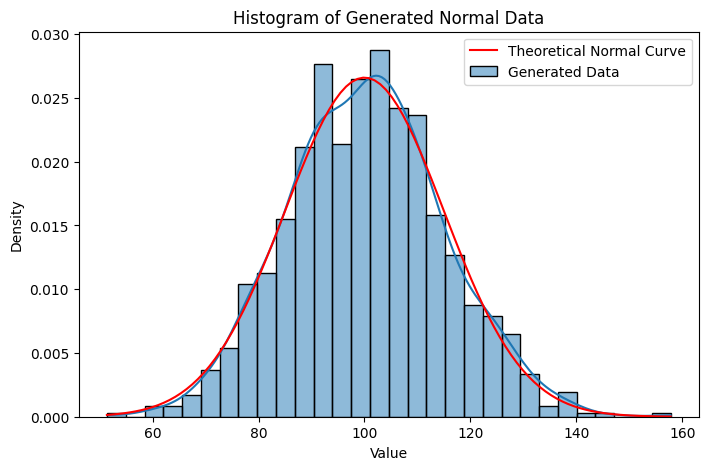

Mean: 266.1718497342919, Std Dev: 1049.1316316182017, Skewness: 16.102697654024176, Kurtosis: 350.9440220030206


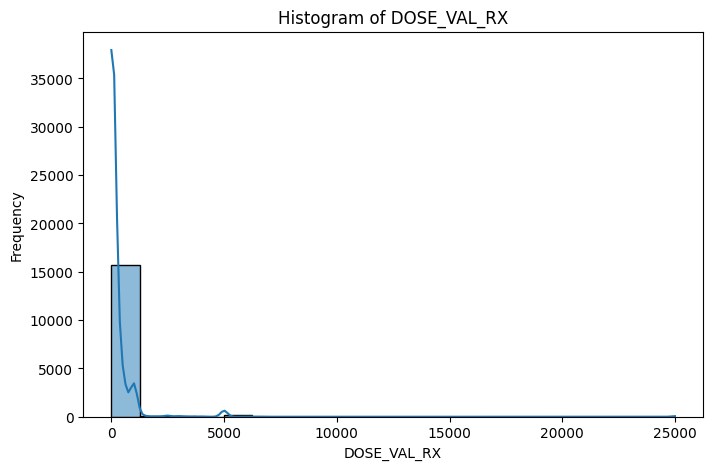

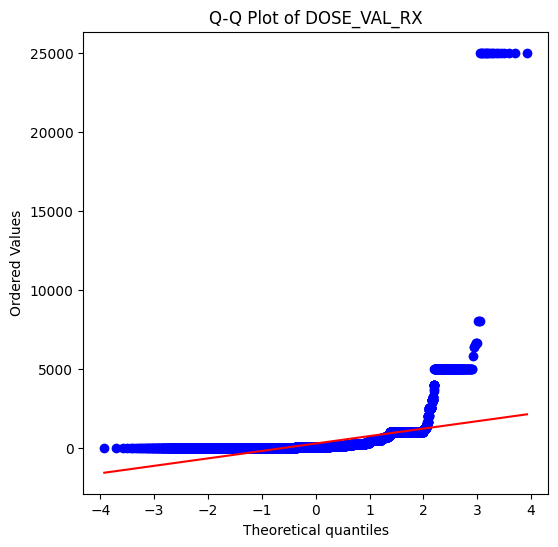

/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 15995.
  res = hypotest_fun_out(*samples, **kwds)


Shapiro-Wilk Test Statistic: 0.20177515233671317, p-value: 8.670213287619841e-123
Probability of DOSE_VAL_RX < 80: 0.4295761797539022
90th Percentile of DOSE_VAL_RX: 1610.6881346969594
PDF at DOSE_VAL_RX = 100: 0.0003755194478528749


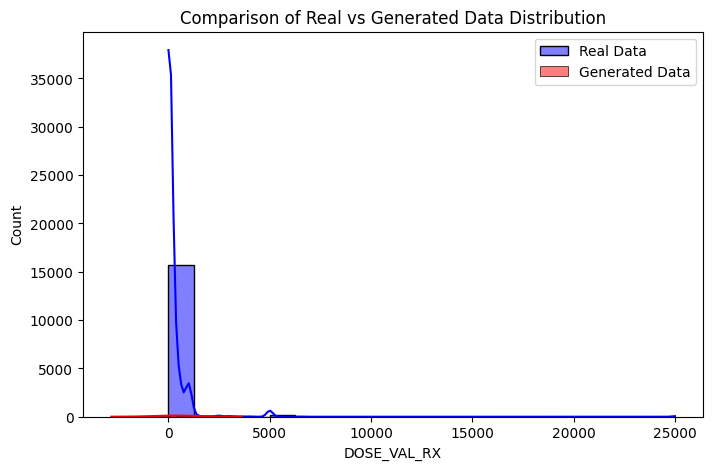

95% Confidence Interval: (249.91284601236822, 282.43085345621563)
Probability of DOSE_VAL_RX > 150: 0.5440853406271496
DOSE_VAL_RX = 150 is within the confidence interval. Regular monitoring is sufficient.


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

file_path = "/content/PRESCRIPTIONS.csv"

df = pd.read_csv(file_path)

print(df.head())

np.random.seed(42)
data = np.random.normal(loc=100, scale=15, size=1000)

plt.figure(figsize=(8, 5))
sns.histplot(data, kde=True, bins=30, stat="density", label="Generated Data")
x = np.linspace(min(data), max(data), 100)
plt.plot(x, stats.norm.pdf(x, 100, 15), label="Theoretical Normal Curve", color='red')
plt.legend()
plt.title("Histogram of Generated Normal Data")
plt.xlabel("Value")
plt.ylabel("Density")
plt.show()


df['DOSE_VAL_RX'] = pd.to_numeric(df['DOSE_VAL_RX'], errors='coerce')
df.dropna(subset=['DOSE_VAL_RX'], inplace=True)


mean_val = df['DOSE_VAL_RX'].mean()
std_val = df['DOSE_VAL_RX'].std()
skew_val = stats.skew(df['DOSE_VAL_RX'])
kurtosis_val = stats.kurtosis(df['DOSE_VAL_RX'])

print(f"Mean: {mean_val}, Std Dev: {std_val}, Skewness: {skew_val}, Kurtosis: {kurtosis_val}")

plt.figure(figsize=(8, 5))
sns.histplot(df['DOSE_VAL_RX'], kde=True, bins=20)
plt.title("Histogram of DOSE_VAL_RX")
plt.xlabel("DOSE_VAL_RX")
plt.ylabel("Frequency")
plt.show()

plt.figure(figsize=(6, 6))
stats.probplot(df['DOSE_VAL_RX'], dist="norm", plot=plt)
plt.title("Q-Q Plot of DOSE_VAL_RX")
plt.show()

shapiro_test = stats.shapiro(df['DOSE_VAL_RX'])
print(f"Shapiro-Wilk Test Statistic: {shapiro_test.statistic}, p-value: {shapiro_test.pvalue}")


probability = stats.norm.cdf(80, loc=mean_val, scale=std_val)
print(f"Probability of DOSE_VAL_RX < 80: {probability}")

quantile_90 = stats.norm.ppf(0.90, loc=mean_val, scale=std_val)
print(f"90th Percentile of DOSE_VAL_RX: {quantile_90}")

pdf_value = stats.norm.pdf(100, loc=mean_val, scale=std_val)
print(f"PDF at DOSE_VAL_RX = 100: {pdf_value}")

random_sample = np.random.normal(loc=mean_val, scale=std_val, size=1000)

plt.figure(figsize=(8, 5))
sns.histplot(df['DOSE_VAL_RX'], kde=True, bins=20, label="Real Data", color='blue', alpha=0.5)
sns.histplot(random_sample, kde=True, bins=20, label="Generated Data", color='red', alpha=0.5)
plt.legend()
plt.title("Comparison of Real vs Generated Data Distribution")
plt.show()

n = len(df['DOSE_VAL_RX'])
se = std_val / np.sqrt(n)
ci_lower, ci_upper = mean_val - 1.96 * se, mean_val + 1.96 * se
print(f"95% Confidence Interval: ({ci_lower}, {ci_upper})")

prob_above_150 = 1 - stats.norm.cdf(150, loc=mean_val, scale=std_val)
print(f"Probability of DOSE_VAL_RX > 150: {prob_above_150}")


if 150 > ci_upper:
    print("DOSE_VAL_RX = 150 is outside the confidence interval. High-risk patients should be monitored.")
else:
    print("DOSE_VAL_RX = 150 is within the confidence interval. Regular monitoring is sufficient.")
